In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Chester : Name: 
Type: Graph
Number of nodes: 27
Number of edges: 364
Average degree:  26.9630


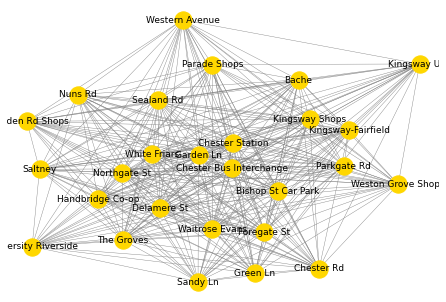

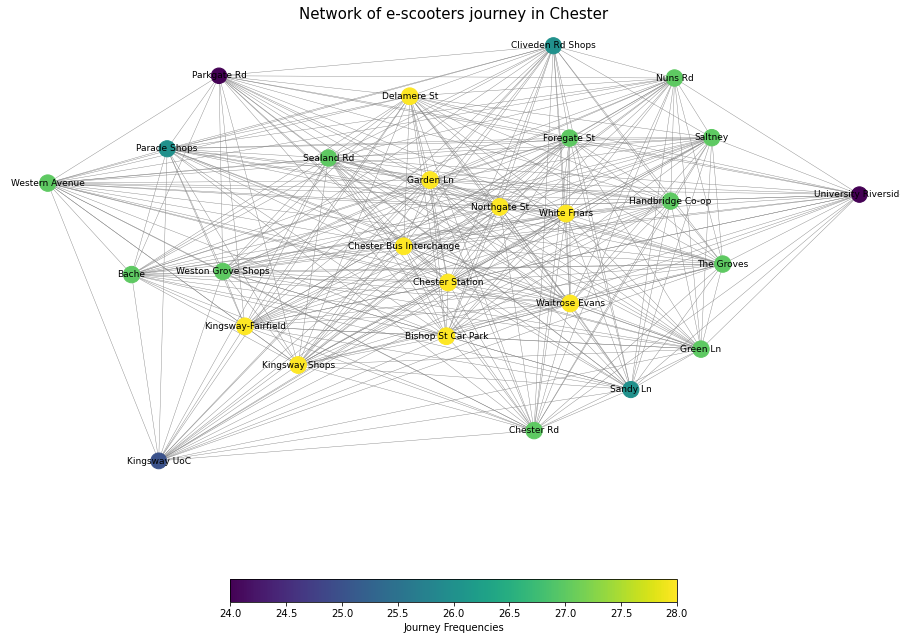

Hartlepool : Name: 
Type: Graph
Number of nodes: 21
Number of edges: 158
Average degree:  15.0476


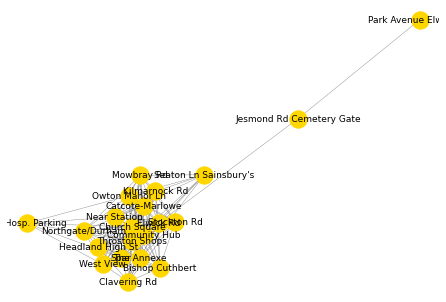

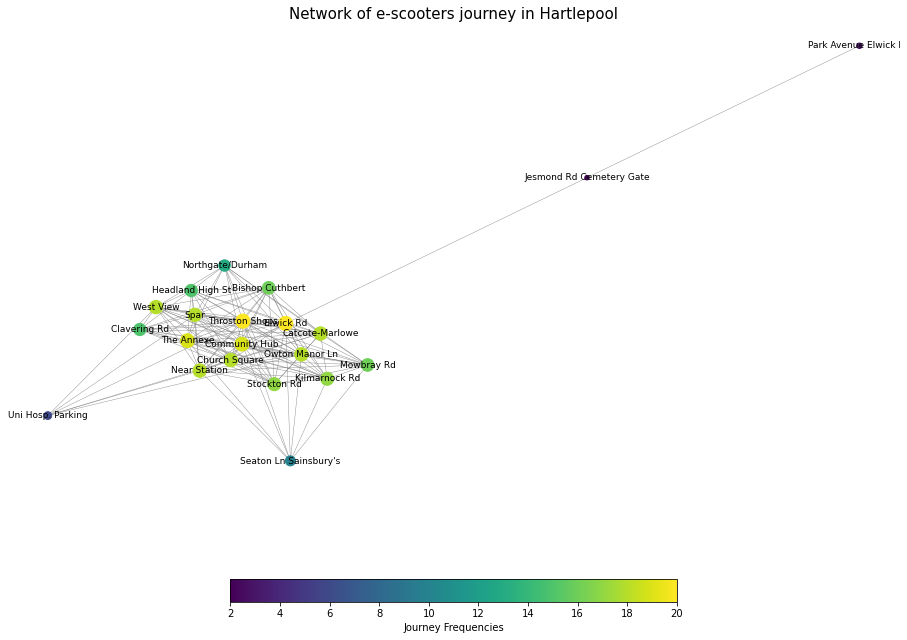

Middlesbrough : Name: 
Type: Graph
Number of nodes: 41
Number of edges: 312
Average degree:  15.2195


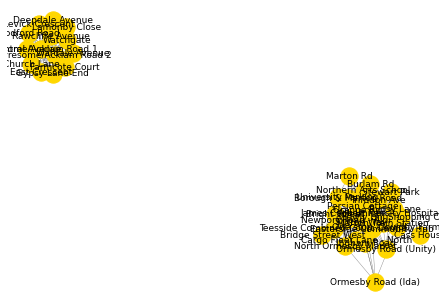

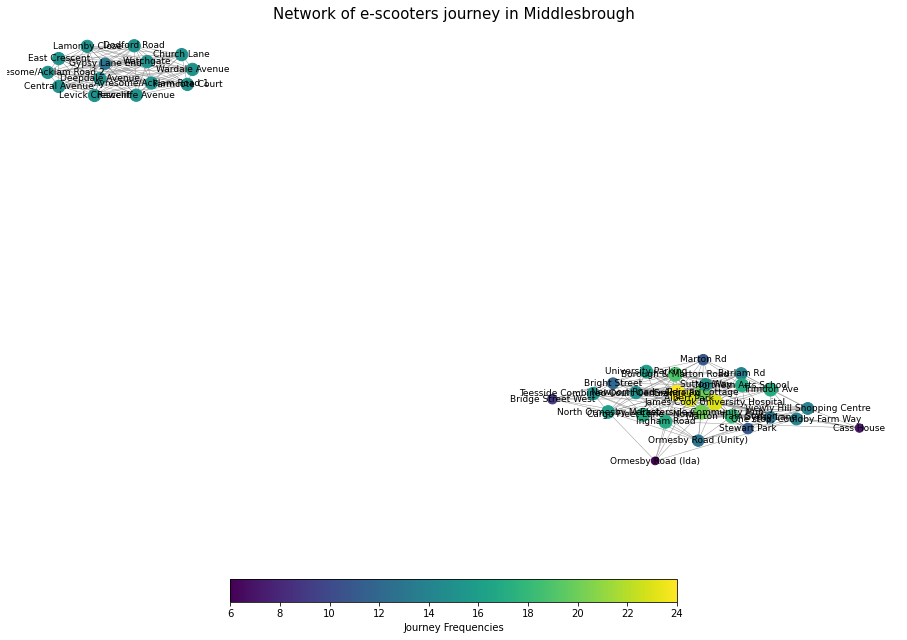

Milton_Keynes : Name: 
Type: Graph
Number of nodes: 135
Number of edges: 3296
Average degree:  48.8296


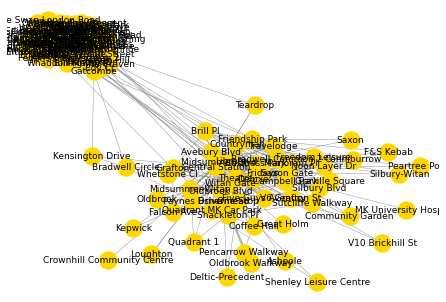

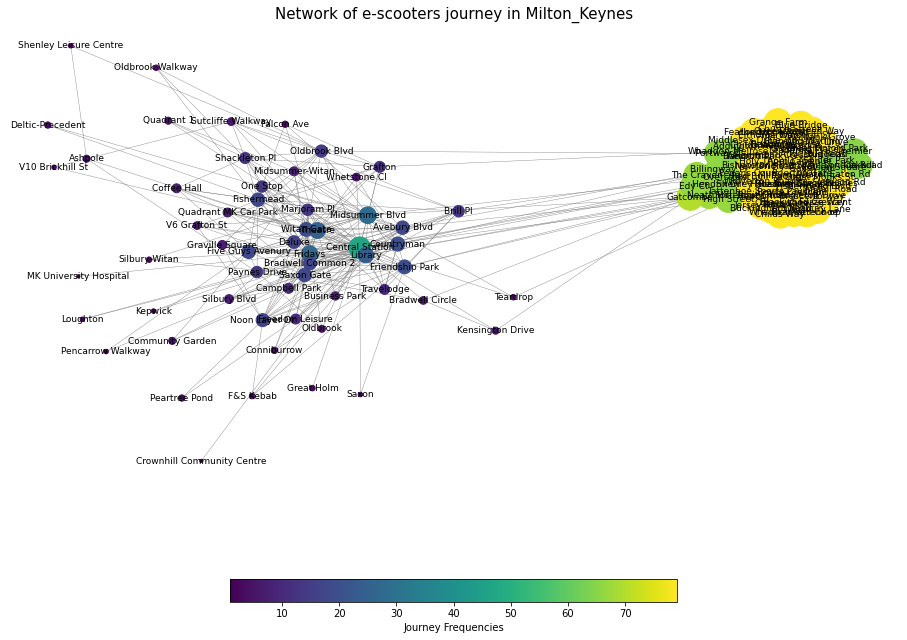

Scunthorpe : Name: 
Type: Graph
Number of nodes: 21
Number of edges: 137
Average degree:  13.0476


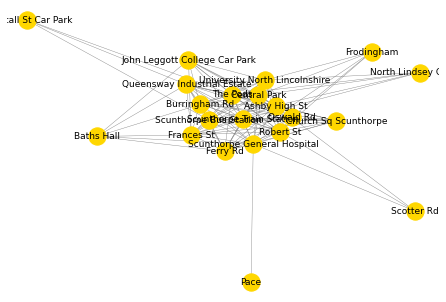

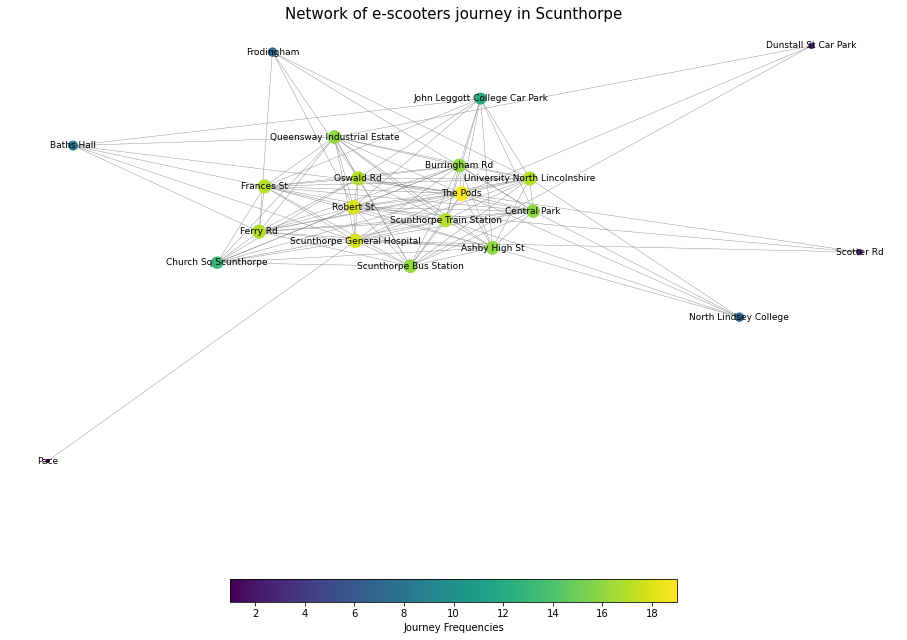

Stafford : Name: 
Type: Graph
Number of nodes: 26
Number of edges: 183
Average degree:  14.0769


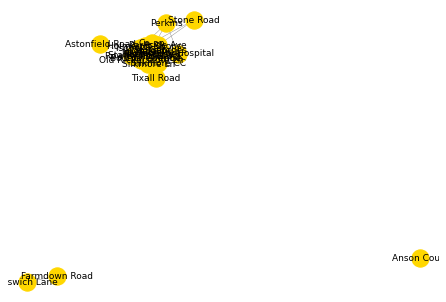

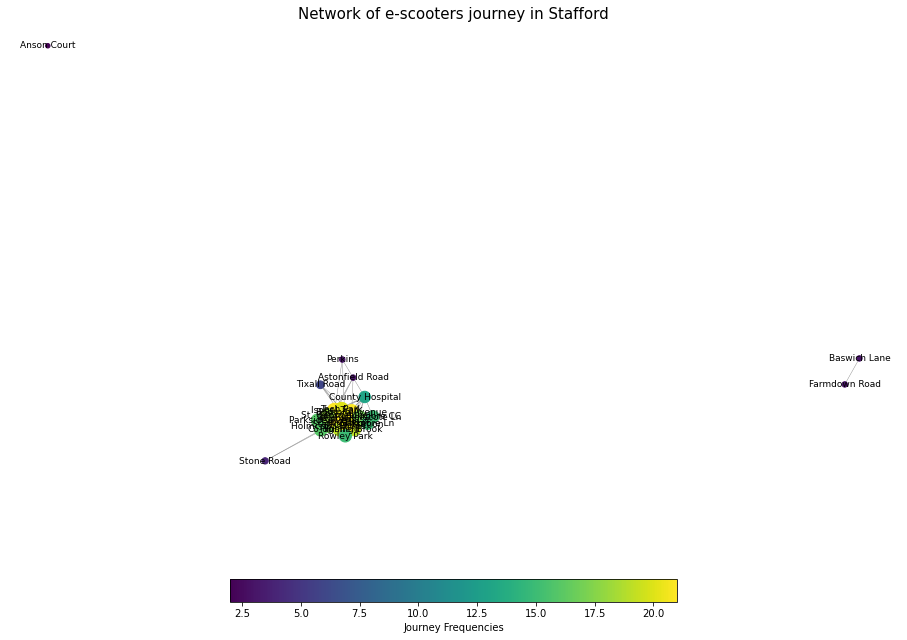

In [2]:
cities = ["Chester", "Hartlepool", "Middlesbrough", "Milton_Keynes", "Scunthorpe", "Stafford"]

for i in range(len(cities)):
    # Read in the edgelist file from csv
    file_network = pd.read_csv("city_final/" + cities[i] + ".csv")[["source", "destination", "n"]]
    file_network = file_network.rename(columns={'source': 'node1', 'destination': 'node2', 'n': 'weight'})
    
    # Create graph object
    G = nx.from_pandas_edgelist(file_network, 'node1', 'node2','weight')
    
    # Plot graph
    nx.draw(G,with_labels=True,node_color='gold',font_size=9,font_color='black',edge_color='gray',width=0.4)
    # Print information about the Graph
    print(cities[i],":",nx.info(G))
    
    #Let us compute the degree centrality
    deg=nx.degree(G) 
    # Data needs to be in the form of dictionary, in which nodes are the keys and attibutes are the values.
    nx.set_node_attributes(G,dict(deg),'degree')
    # Return degree attributes that we will use for the colour of nodes 
    deg_color=[(node['degree']) for i, node in G.nodes(data=True)]
    deg_size=[(float(node['degree'])*10) for i, node in G.nodes(data=True)]
    
    fig, ax = plt.subplots(figsize=(16,12))
    pos=nx.spring_layout(G)
    nx.draw_networkx_labels(G, pos,font_size=9,font_color='black')
    nx.draw_networkx_edges(G, pos,edge_color='gray', width=0.4)
    nod=nx.draw_networkx_nodes(G,pos = pos,node_color= deg_color,node_size= deg_size)
    plt.colorbar(nod,label="Journey Frequencies",orientation="horizontal", shrink=0.5)
    
    # plt.legend(deg_color)
    plt.axis("off")
    plt.title("Network of e-scooters journey in "+cities[i],fontsize=15)
    plt.savefig('network_graph/'+cities[i]+'.png')
    plt.show()